In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
sns.set(style='white')

In [2]:
data=pd.read_csv("/content/banking.csv")

In [3]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [4]:
data['job'].value_counts()

,count
job,
admin.,10422
blue-collar,9254
technician,6743
services,3969
management,2924
retired,1720
entrepreneur,1456
self-employed,1421
housemaid,1060


In [5]:
data['marital'].value_counts()

,count
marital,
married,24928
single,11568
divorced,4612
unknown,80


In [6]:
print(data.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [8]:
data.groupby('job')[data.select_dtypes(include='number').columns].mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [9]:
data.groupby('y')[data.select_dtypes(include='number').columns].mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
y,,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600,0.0
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991,1.0


Text(0, 0.5, 'Freq of Purchase')

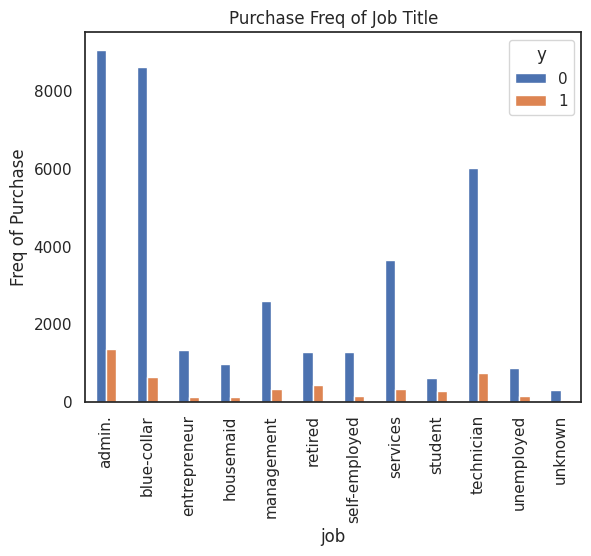

In [10]:
%matplotlib inline
pd.crosstab(data['job'],data['y']).plot(kind='bar')
plt.title("Purchase Freq of Job Title")
plt.xlabel("job")
plt.ylabel("Freq of Purchase")

Text(0, 0.5, 'Freq of Purchase')

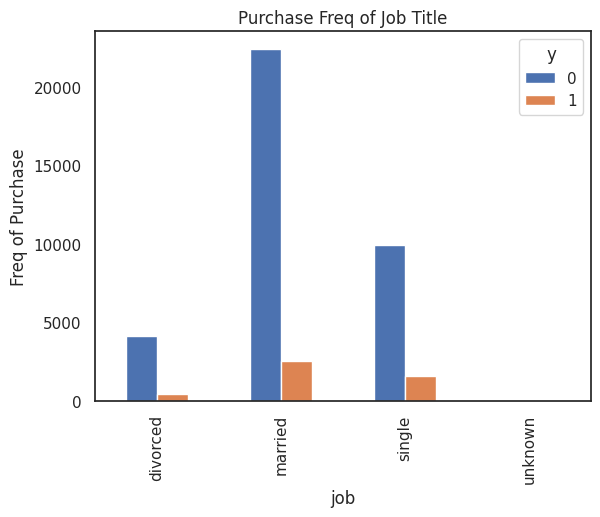

In [11]:
%matplotlib inline
pd.crosstab(data['marital'],data['y']).plot(kind='bar')
plt.title("Purchase Freq of Job Title")
plt.xlabel("job")
plt.ylabel("Freq of Purchase")

***Normalising the above graph***

<Axes: xlabel='marital'>

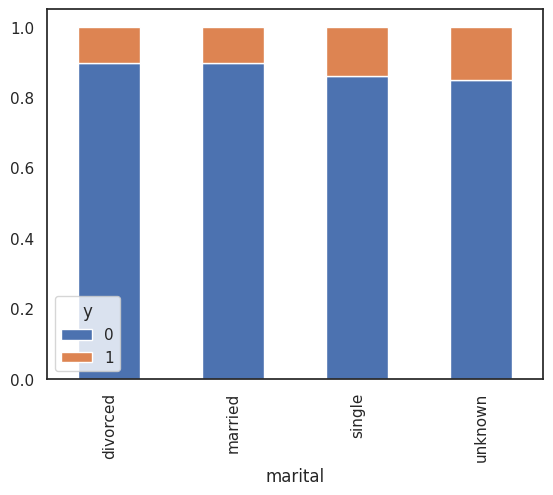

In [12]:
%matplotlib inline
table = pd.crosstab(data['marital'],data['y'])
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

<Axes: xlabel='education'>

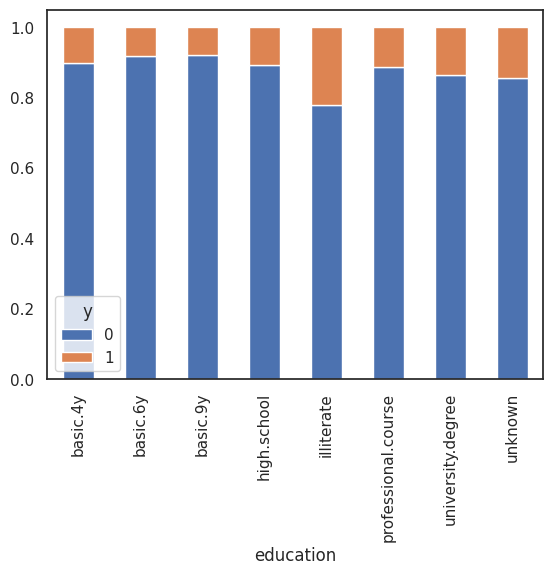

In [13]:
%matplotlib inline
table = pd.crosstab(data['education'],data['y'])
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

<Axes: >

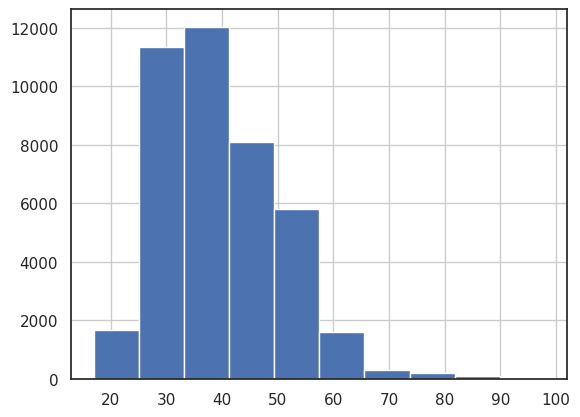

In [14]:
data['age'].hist()

In [15]:
data_final=pd.get_dummies(data, drop_first=True)
data_final

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,False,False,False,False,False,True,False,False,True,False
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,False,True,False,False,False,False,False,False,True,False
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,False,False,False,False,False,True,False,False,False,True
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,False,False,False,False,False,False,False,False,True,False
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,...,False,False,False,False,False,True,False,False,True,False
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,True,False,False,False,False,True,False,False,True,False
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,False,False,True,True,False
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,...,False,False,True,False,False,False,True,False,True,False


In [16]:
#Smote
X=data_final.drop(columns='y')
y=data_final['y']

In [17]:
import imblearn
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=0)
columns=X_train.columns

os_data_X,os_data_y=os.fit_resample (X_train,y_train)
os_data_X=pd.DataFrame(data=os_data_X,columns=columns)
os_data_y=pd.DataFrame(data=os_data_y,columns=['y'])

In [18]:
os_data_y['y'].value_counts(normalize=True)

,proportion
y,
0,0.5
1,0.5


***Recurssive Feature Elimination technique***

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

rfe=RFE(logreg,n_features_to_select=20)
rfe=rfe.fit(os_data_X,os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[False False False False False False False False False False False False
  True False  True False False False False False False  True  True  True
  True  True  True  True  True  True  True False False False False False
 False False False False False False  True False False  True  True  True
  True  True  True False  True]
[29 30 26 32 27 24 25 31 17 28  3  6  1 10  1  7  8  2  9  4  5  1  1  1
  1  1  1  1  1  1  1 22 34 18 19 23 20 21 12 33 13 11  1 15 14  1  1  1
  1  1  1 16  1]


In [21]:
cols=X.columns[rfe.support_]
cols

Index(['job_housemaid', 'job_retired', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'month_mar', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_success'],
      dtype='object')

In [23]:
X=os_data_X[cols]
y=os_data_y['y']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred=logreg.predict(X_test)
print('Accuracy of logistic Regression {: .2f}'.format(logreg.score(X_test,y_test)))

Accuracy of logistic Regression  0.89
